<a href="https://colab.research.google.com/github/dexqy/ml/blob/main/image_classificatin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [10]:
tf.config.list_physical_devices('GPU')

[]

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
datadir = '/content/drive/MyDrive/data'
image_exts=['jpeg','jpg','bmp','png']

In [13]:
for image_class in os.listdir(datadir):
    for image in os.listdir(os.path.join(datadir, image_class)):
        image_path = os.path.join(datadir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [14]:
data=tf.keras.utils.image_dataset_from_directory(datadir)


Found 305 files belonging to 2 classes.


In [15]:
data_iterator=data.as_numpy_iterator()

In [16]:

batch=data_iterator.next()

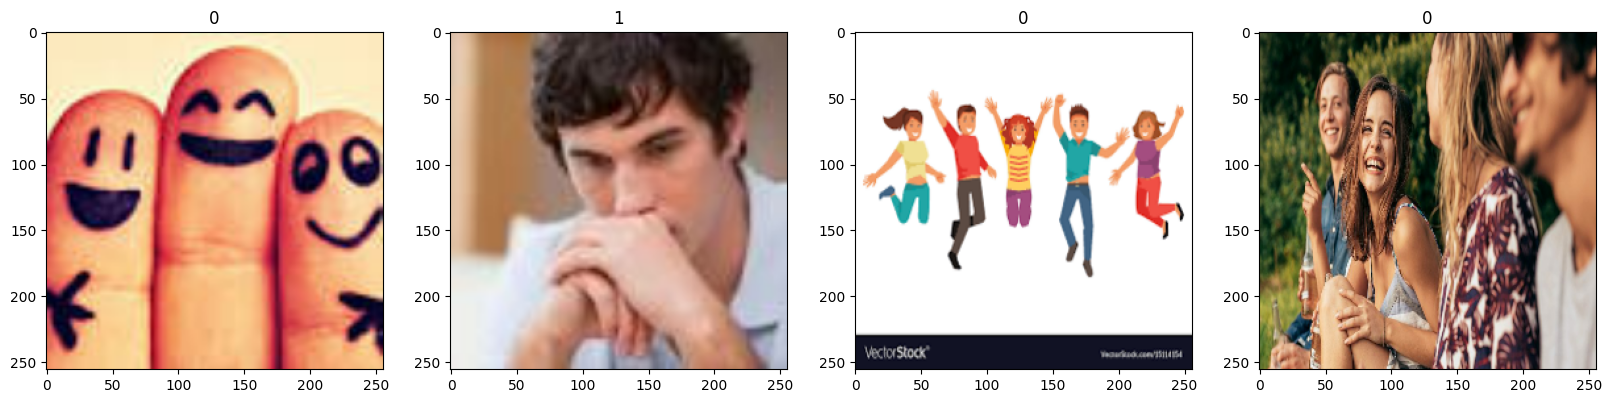

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [18]:
data = data.map(lambda x,y: (x/255, y))

data.as_numpy_iterator().next()

(array([[[[0.29411766, 0.3137255 , 0.2901961 ],
          [0.29479167, 0.3143995 , 0.2908701 ],
          [0.2978554 , 0.31746325, 0.2939338 ],
          ...,
          [0.35667893, 0.34491423, 0.3096201 ],
          [0.3536152 , 0.3418505 , 0.30655637],
          [0.3529412 , 0.34117648, 0.30588236]],
 
         [[0.29479167, 0.3137255 , 0.28985906],
          [0.2954367 , 0.31437054, 0.29050413],
          [0.2983688 , 0.3173026 , 0.2934362 ],
          ...,
          [0.3556521 , 0.3444166 , 0.30894607],
          [0.35232508, 0.34148452, 0.30588236],
          [0.35159314, 0.34083948, 0.30520833]],
 
         [[0.2978554 , 0.3137255 , 0.28832722],
          [0.2983688 , 0.3142389 , 0.28884062],
          [0.3007025 , 0.3165726 , 0.29117432],
          ...,
          [0.3509847 , 0.3421547 , 0.30588236],
          [0.3464609 , 0.339821  , 0.30281863],
          [0.3454657 , 0.3393076 , 0.30214462]],
 
         ...,
 
         [[0.19289216, 0.1889706 , 0.16936274],
          [0.19289

In [19]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [20]:

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [21]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [22]:

model = Sequential()

In [23]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:


model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
logdir='logs'

In [27]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [28]:

hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.4605 - loss: 1.3528 - val_accuracy: 0.4375 - val_loss: 0.7234
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.5377 - loss: 0.6967 - val_accuracy: 0.5312 - val_loss: 0.6525
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step - accuracy: 0.5082 - loss: 0.6525 - val_accuracy: 0.6562 - val_loss: 0.5954
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.7033 - loss: 0.5953 - val_accuracy: 0.8281 - val_loss: 0.4957
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.7625 - loss: 0.5256 - val_accuracy: 0.6406 - val_loss: 0.5618
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.7067 - loss: 0.5288 - val_accuracy: 0.7188 - val_loss: 0.4945
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.7608 - loss: 0.4792 - val_accuracy: 0.9219 - val_loss: 0.2752
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step - accuracy: 0.8670 - loss: 0.3862 - val_accuracy: 0.8906 - val_loss: 0.3093
Epoch 9/

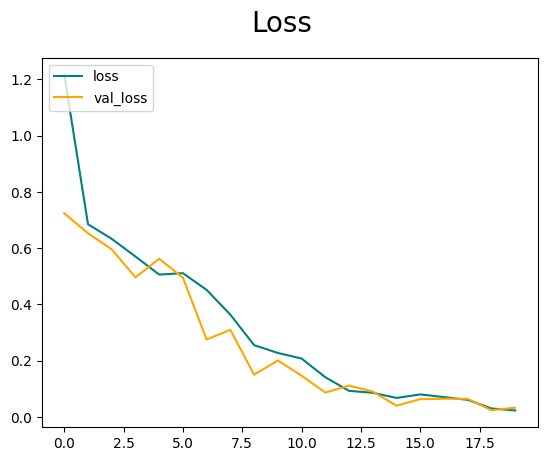

In [29]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()


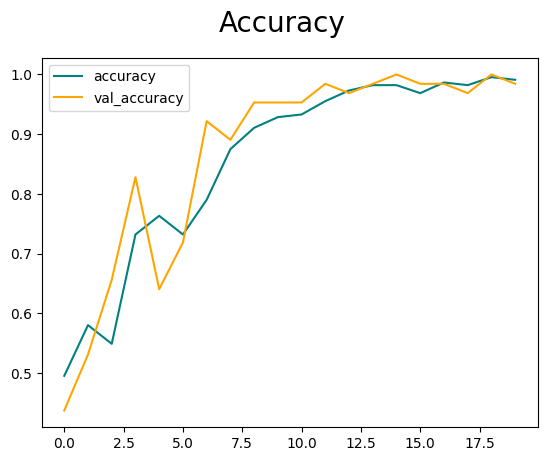

In [30]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


In [31]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()


In [32]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


In [33]:
print(pre.result(), re.result(), acc.result())


tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [34]:
os.makedirs('models', exist_ok=True)

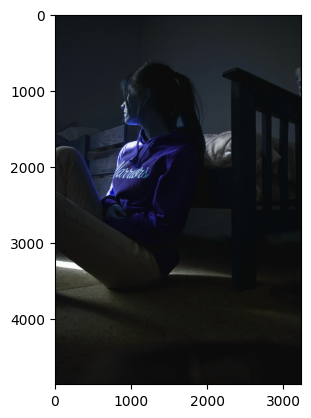

In [36]:
image_path = '/content/drive/MyDrive/testimages/pexels-sofia-alejandra-946049-3007355.jpg'
img = cv2.imread(image_path)
plt.imshow(img)
plt.show()


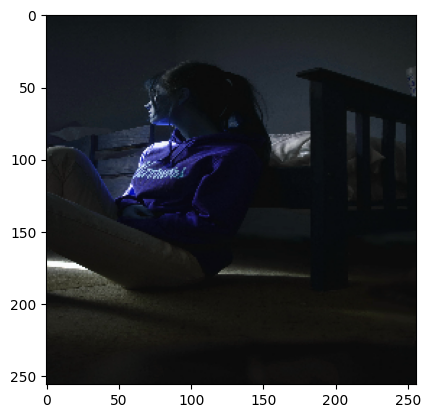

In [38]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [40]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [42]:
yhat
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In [43]:
from tensorflow.keras.models import load_model

model_path = '/content/drive/MyDrive/data/imageclassifier.keras'
model.save(model_path)
new_model = load_model(model_path)
prediction = new_model.predict(np.expand_dims(resize / 255.0, axis=0))
print(prediction)




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
[[0.9998398]]
